In [8]:
import pandas as pd

zoo_data = pd.read_csv("e:/zoo_data-1.csv", encoding = 'utf-8',
                                index_col = ["animal_name"])

print(zoo_data.head())

             hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
animal_name                                                                     
aardvark        1         0     0     1         0        0         1        1   
antelope        1         0     0     1         0        0         0        1   
bass            0         0     1     0         0        1         1        1   
bear            1         0     0     1         0        0         1        1   
boar            1         0     0     1         0        0         1        1   

             backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
animal_name                                                                     
aardvark            1         1         0     0     4     0         0        1  
antelope            1         1         0     0     4     1         0        1  
bass                1         0         0     1     0     1         0        0  
bear                1      

In [11]:
from sklearn.cluster import KMeans
clusters = 7

kmeans = KMeans(n_clusters = clusters)
kmeans.fit(zoo_data)

print(kmeans.labels_)

[0 0 5 0 0 0 0 5 5 0 0 1 5 3 6 2 1 0 5 5 1 1 0 1 2 6 6 4 0 4 2 0 4 1 5 0 0
 1 5 2 2 1 2 1 0 0 2 0 0 0 0 2 6 2 0 0 1 1 1 1 5 5 3 0 0 0 5 0 0 0 0 1 2 5
 5 4 5 3 1 1 3 3 5 1 4 6 5 1 2 6 6 6 5 4 0 1 4 2 0 3 1]


In [12]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(zoo_data)

pca_data = pd.DataFrame(pca.transform(zoo_data))

print(pca_data.head())

          0         1         2
0  1.351029 -1.058533  0.314103
1  1.306634 -1.208344 -0.289405
2 -3.131655  0.252200  0.929419
3  1.351029 -1.058533  0.314103
4  1.277296 -1.225750  0.126239


In [18]:
from matplotlib import colors as mcolors
import math

colors = list(zip(*sorted((
                    tuple(mcolors.rgb_to_hsv(
                          mcolors.to_rgba(color)[:3])), name)
                    for name, color in dict(
                           mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
                                                     ).items())))[1]

skips = math.floor(len(colors[5 : -5])/clusters)
cluster_colors = colors[5 : -5 : skips]

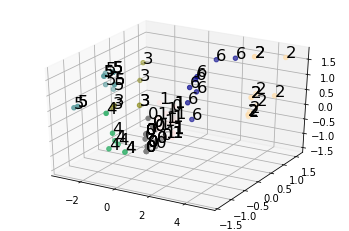

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2],
           c = list(map(lambda label : cluster_colors[label],
                                           kmeans.labels_)))
str_labels = list(map(lambda label: '% s' % label, kmeans.labels_))

list(map(lambda data1, data2, data3, str_label:
         ax.text(data1, data2, data3, s = str_label, size = 16.5,
                zorder = 20, color = 'k'), pca_data[0], pca_data[1],
                pca_data[2], str_labels))

plt.show()

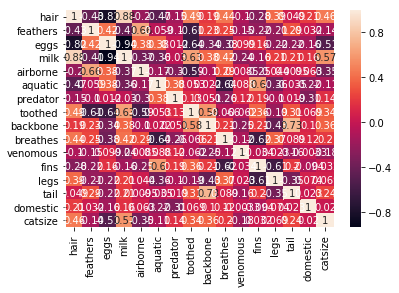

In [24]:
import seaborn as sns

sns.heatmap(zoo_data.corr(), annot=True)

plt.show()